### Perform PCA by using eigen decomposion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random

random.seed(10)
np.random.seed(10)
sns.set_theme()

In [2]:
artificial_df = pd.read_csv('../pca_2d_dataset.csv')
artificial_df.head()

,Feature 1,Feature 2
0,0,11.031906
1,2,10.816060
2,4,11.836182
3,6,17.749648
4,8,17.568312


Text(0.5, 1.0, 'Example Dataset')

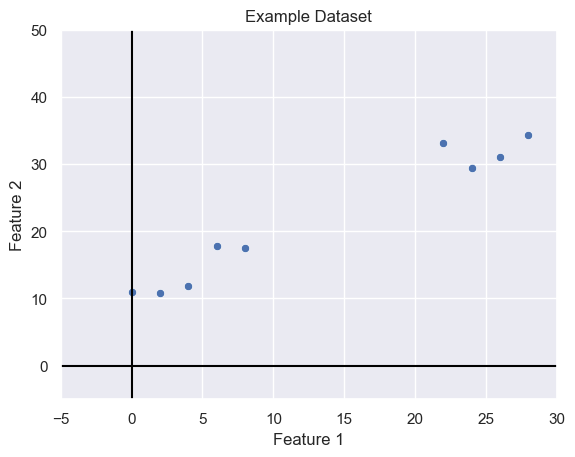

In [3]:
# plot the dataset

sns.scatterplot(data=artificial_df,
                x='Feature 1',
                y='Feature 2')

plt.hlines(xmin=-5, xmax= 30, y=0, colors='black')
plt.vlines(ymin=-5, ymax= 50, x=0, colors='black')

plt.xlim([-5, 30])
plt.ylim([-5, 50])

plt.title("Example Dataset")

C:\Users\Sub\AppData\Local\Temp\ipykernel_20592\3742513108.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.24034735 -1.05429524 -0.86824314 -0.68219104 -0.49613894  0.80622577
  0.99227788  1.17832998  1.36438208]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  artificial_df[:] = StandardScaler().fit_transform(artificial_df)


Text(0.5, 1.0, 'Scaled Dataset')

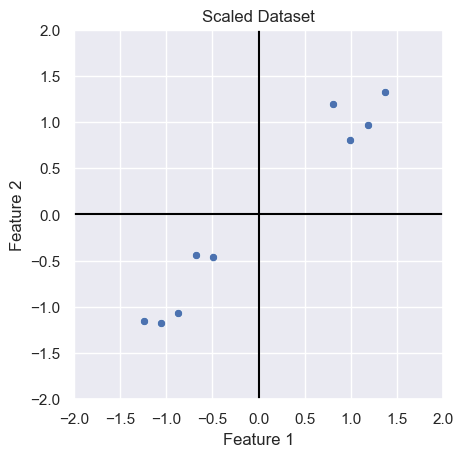

In [4]:
# scale the data
artificial_df[:] = StandardScaler().fit_transform(artificial_df)

sns.scatterplot(artificial_df,
                x='Feature 1',
                y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, colors='black')
plt.vlines(ymin=-5, ymax=50, x=0, colors='black')

plt.xlim([-2,2])
plt.ylim([-2,2])

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Scaled Dataset')

In [5]:
# calculate the covariance matrix

cov_mtx = artificial_df.cov().to_numpy()
cov_mtx

array([[1.125     , 1.10293497],
       [1.10293497, 1.125     ]])

In [6]:
# calculate eigenvalues and eigenvectores

eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [7]:
eigenvalues

array([2.22793497, 0.02206503])

In [8]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

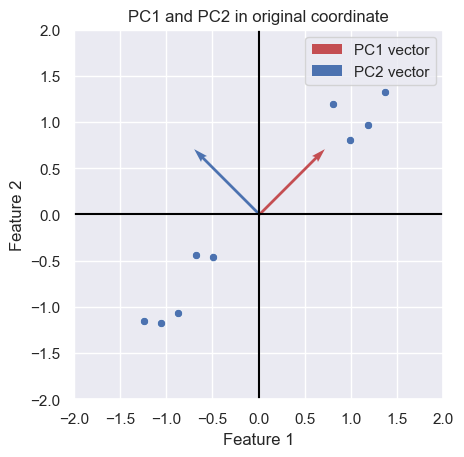

In [13]:
# plot PCs in original coordinate systems

plt.figure()

sns.scatterplot(artificial_df,
                x='Feature 1',
                y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, colors='black')
plt.vlines(ymin=-5, ymax=50, x=0, colors='black')

plt.xlim([-2,2])
plt.ylim([-2,2])

plt.quiver(
    0,0,
    eigenvectors[:,0][0],
    eigenvectors[:,0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 vector'
)

plt.quiver(
    0,0,
    eigenvectors[:,1][0],
    eigenvectors[:,1][1],
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label='PC2 vector'
)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('PC1 and PC2 in original coordinate')
plt.show()

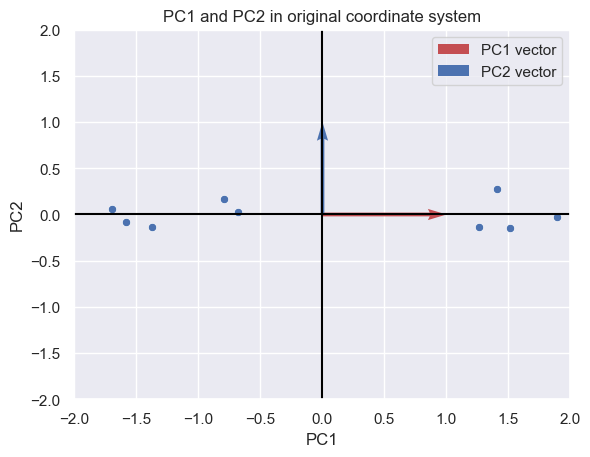

In [17]:
# Perform change basis

transformed_data = eigenvectors.T @ artificial_df.to_numpy().T

transformed_df = pd.DataFrame(transformed_data.T,
                              columns=['PC1', 'PC2'])


transformed_axis = eigenvectors.T @ eigenvectors

plt.figure()

sns.scatterplot(transformed_df,
                x='PC1',
                y='PC2')

plt.hlines(xmin=-5, xmax=30, y=0, colors='black')
plt.vlines(ymin=-5, ymax=50, x=0, colors='black')

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.quiver(
    0,0,
    transformed_axis[:,0][0],
    transformed_axis[:,0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 vector'
)

plt.quiver(
    0,0,
    transformed_axis[:,1][0],
    transformed_axis[:,1][1],
    angles='xy',scale_units='xy',
    scale=1, color='b',
    label='PC2 vector'
)

plt.gca().set_aspect('auto', adjustable='box')
plt.legend()
plt.title('PC1 and PC2 in original coordinate system')
plt.show()



In [18]:
def plot_data_and_axis(data, eigenvectors=None, axis_min=None, 
                        axis_max=None, figsize=None):
    
    """
    This function plots data in a 3D coordinate system.
    This functio also plots coordinate system axis or arbitrary
    set of vectors.
    
    :param data: numpy dataset with 3 features
    :param eigenvectors: transposed eigenvector matrix
    :param axis_min: min value for each axis on the plot
    :param axis_max: max value for each axis on the plot
    :return: 
    """
    
    # Create 3D figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the data
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.2)
    
    # Set axis labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    # Set minimum and maximum value for axis
    if axis_min and axis_max:
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_zlim(axis_min, axis_max)

    ax.view_init(elev=20, azim=-35, roll=0)
    
    # Choose which axis will be plotted (arrow tips)
    if eigenvectors is not None:
        plot_vectors = eigenvectors
    else:
        plot_vectors = [
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ]
    
    # Always set origin at [0,0,0] (arrow starting point)
    origin = [0, 0, 0]
    
    # Iterate over coordinate system arrows (three of them)
    for i, component in enumerate(plot_vectors):
        
        # Plot arrow
        ax.quiver(
            origin[0],
            origin[1],
            origin[2],
            component[0],
            component[1],
            component[2],
            color=['r', 'g', 'b'][i],
            lw=2
        )

    plt.show()

In [23]:
# create 2D normally distributed data
means = np.array([0,0])
var = np.array([[1, 0.5],
                [0.5, 1]])

x_ydata = np.random.multivariate_normal(mean=means, cov=var, size=500)
z_data = 1.5 * x_ydata[:,1]

# Merge z axis in x and y
np_3d_data = np.column_stack([x_ydata, z_data])

# create dataframe of 3D data
df_3d = pd.DataFrame(np_3d_data,
                     columns=['x','y','z'])

df_3d.head()


,x,y,z
0,1.766479,1.852098,2.778147
1,-1.541446,0.437341,0.656011
2,-0.597422,-0.845766,-1.268649
3,0.965332,1.411446,2.117170
4,0.316470,-2.097657,-3.146486


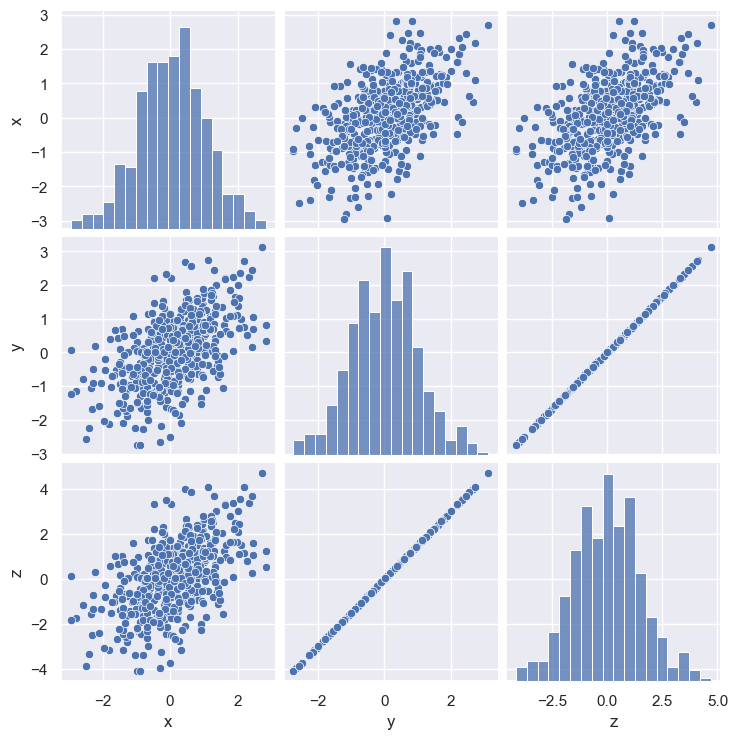

In [24]:
sns.pairplot(df_3d)

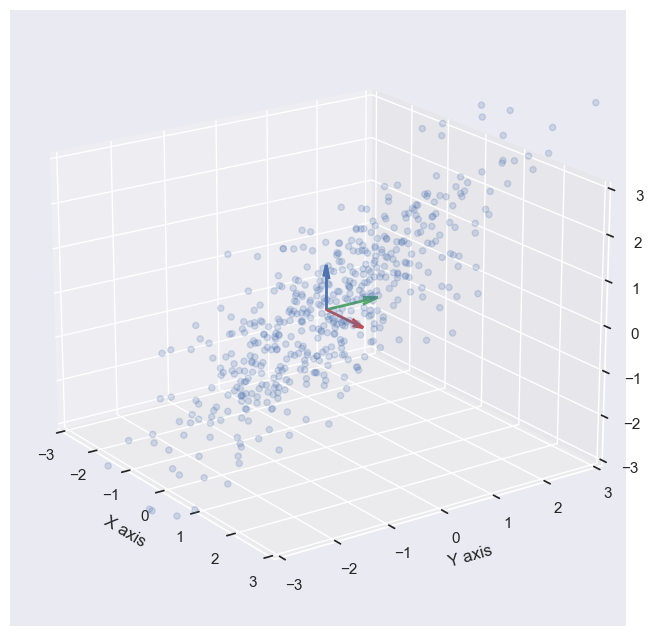

In [26]:
# plot data in original coordinate system
plot_data_and_axis(data=np_3d_data,
                   axis_min=-3,
                   axis_max=3,
                   figsize=(8,8))

In [27]:
# calculate the covariance matrix
cov_mat = df_3d.cov().to_numpy()

In [28]:
# calculate eigenvalues and eigenmatrics
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

In [29]:
eigenvalues

array([6.61689596e-01, 3.71650772e+00, 1.84752279e-16])

In [30]:
np.set_printoptions(suppress=True)
eigenvalues/np.sum(eigenvalues)*100

array([15.11328862, 84.88671138,  0.        ])

In [31]:
eigenvectors

array([[-0.93928759,  0.34313093, -0.        ],
       [ 0.19033479,  0.52102301, -0.83205029],
       [ 0.28550219,  0.78153451,  0.5547002 ]])

In [34]:
sort_idx = np.flip(np.argsort(eigenvalues))
sort_idx

array([1, 0, 2], dtype=int64)

In [35]:
eigenvalues = eigenvalues[sort_idx]
eigenvalues

array([3.71650772, 0.6616896 , 0.        ])

In [36]:
eigenvectors = eigenvectors[:,sort_idx]
eigenvectors

array([[ 0.34313093, -0.93928759, -0.        ],
       [ 0.52102301,  0.19033479, -0.83205029],
       [ 0.78153451,  0.28550219,  0.5547002 ]])

In [37]:
eigenvectors.T

array([[ 0.34313093,  0.52102301,  0.78153451],
       [-0.93928759,  0.19033479,  0.28550219],
       [-0.        , -0.83205029,  0.5547002 ]])

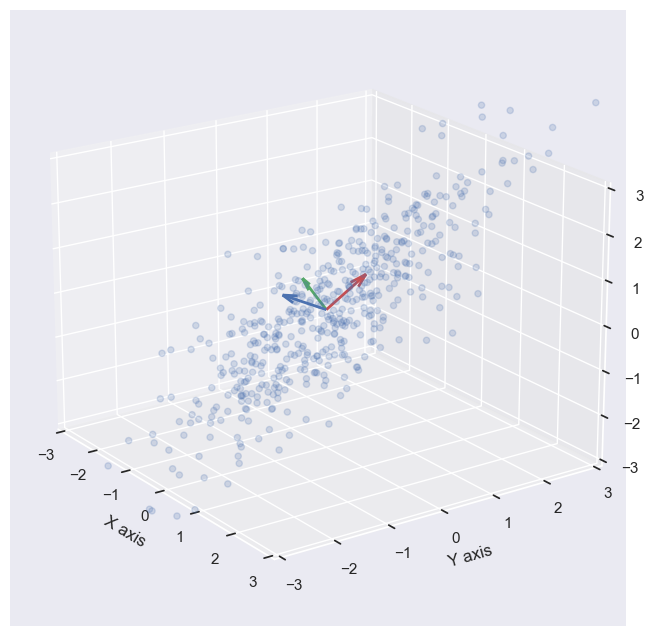

In [39]:
# plot the data and the principle component
plot_data_and_axis(data=np_3d_data,
                   eigenvectors=eigenvectors.T,
                   axis_min=-3,
                   axis_max=3,
                   figsize=(8,8))

In [40]:
# transform data to 2D

transformation_matrix = eigenvectors[:,:-1].T

tranformation_data = transformation_matrix @ df_3d.to_numpy().T

In [42]:
transformed_df = pd.DataFrame(data=tranformation_data.T,
                              columns=['PC1', 'PC2'])

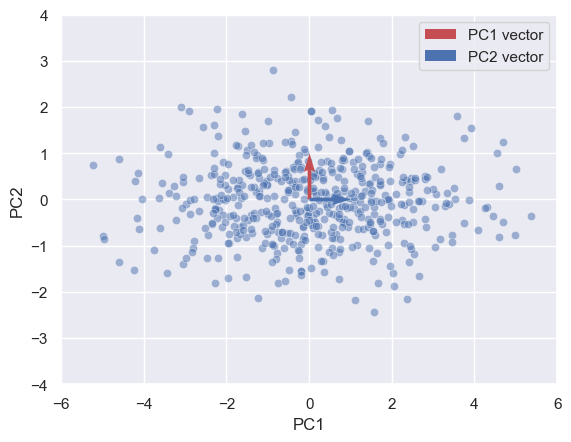

In [44]:
plt.figure()

sns.scatterplot(data=transformed_df,
                x='PC1',
                y='PC2',
                alpha=0.5)

plt.quiver(0,0,0,1,angles='xy',scale_units='xy',scale=1, color='r',label='PC1 vector')
plt.quiver(0,0,1,0,angles='xy',scale_units='xy',scale=1,color='b' ,label='PC2 vector')

plt.xlim([-6,6])
plt.ylim([-4,4])
plt.gca().set_aspect('auto',adjustable='box')
plt.legend()
plt.show()
